In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Exploration and Preprocessing 

In [4]:
#load the datset
df = pd.read_csv("Imdb.csv",encoding = "latin1")
df.head()

,review,sentiment,Unnamed: 2,Unnamed: 3
0,One of the other reviewers has mentioned that ...,positive,NaN,NaN
1,A wonderful little production. <br /><br />The...,positive,NaN,NaN
2,I thought this was a wonderful way to spend ti...,positive,NaN,NaN
3,Basically there's a family where a little boy ...,negative,NaN,NaN
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,NaN,NaN


In [5]:
#drop columns with nan values
df = df.dropna(axis=1)

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
#checking for null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
#identifying class imbalances
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:",sentiment_counts)

Sentiment Distribution: sentiment
positive    25000
negative    25000
Name: count, dtype: int64


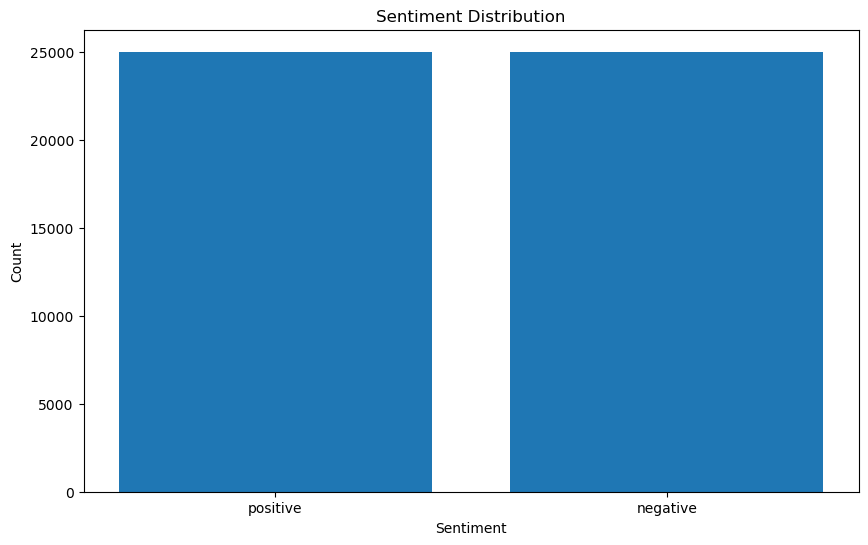

In [14]:
plt.figure(figsize=(10,6))
plt.bar(sentiment_counts.index,sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

The classes are balanced.

In [17]:
#Analyzing review lengths
df["review_length"] = df["review"].apply(len)
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [19]:
df["review_length"].describe()

count    50000.000000
mean      1309.367720
std        989.759532
min          7.000000
25%        699.000000
50%        970.000000
75%       1590.000000
max      13704.000000
Name: review_length, dtype: float64

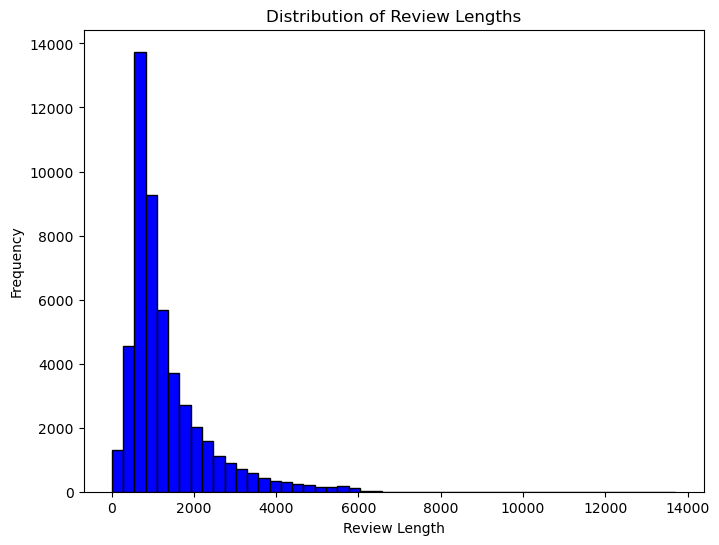

In [21]:
plt.figure(figsize=(8,6))
plt.hist(df['review_length'],bins=50,color='blue',edgecolor='black')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

In [22]:
#OUTLIERS
outliers = df[df['review_length']>4000]
print("Outliers(review length >4000) Count:",outliers.shape[0])

Outliers(review length >4000) Count: 1507


In [25]:
#preprocessing
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('stopwrods')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading stopwrods: Package 'stopwrods' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vyshn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
lemmatizer = WordNetLemmatizer()

def preprocess_review(text):
    #lowercase
    text = text.lower()
    #tokenize
    tokens = word_tokenize(text)
    #punctuation
    tokens = [word for word in tokens if word not in string.punctuation and word.isalpha()]
    #stopwords
    stop_words = set(stopwords.words('english'))
    tokens =[word for word in tokens if word not in stop_words]
    #lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

df['processed_review']=df['review'].apply(preprocess_review)

print(df[['review','processed_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


### Feature Engineering

In [30]:
#textual features
import numpy as np
import re

df['word_count'] = df['processed_review'].apply(lambda x: len(x.split()))
df['char_count'] = df['review'].apply(len)
df['avg_word_length'] = df['processed_review'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df.head()

,review,sentiment,review_length,processed_review,word_count,char_count,avg_word_length
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewer mentioned watching oz episode hoo...,168,1761,5.494048
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production br br filming tech...,86,998,6.244186
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...,84,926,5.583333
3,Basically there's a family where a little boy ...,negative,748,basically family little boy jake think zombie ...,67,748,5.373134
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visually stunnin...,127,1317,5.551181


In [32]:
#vectorization and splittibg data into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df[['processed_review', 'word_count', 'char_count', 'avg_word_length']]
y = df['sentiment']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#combining textual features
textual_features = df[['word_count', 'char_count', 'avg_word_length']]

# Separate textual features
train_textual_features = X_train_raw[['word_count', 'char_count', 'avg_word_length']]
test_textual_features = X_test_raw[['word_count', 'char_count', 'avg_word_length']]

X_train_raw = X_train_raw['processed_review']
X_test_raw = X_test_raw['processed_review']

tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)
X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)



# Convert TF-IDF features to DataFrame
tfidf_columns = [f"tfidf_{i}" for i in range(5000)]  # Explicitly name TF-IDF columns
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray())

# Combine TF-IDF and textual features
X_train = pd.concat([X_train_tfidf_df, train_textual_features.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_tfidf_df, test_textual_features.reset_index(drop=True)], axis=1)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [34]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
print("X_train columns:", X_train.columns)

X_train shape: (40000, 5003) y_train shape: (40000,)
X_test shape: (10000, 5003) y_test shape: (10000,)
X_train columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '4993', '4994', '4995', '4996', '4997', '4998', '4999', 'word_count',
       'char_count', 'avg_word_length'],
      dtype='object', length=5003)


### Model Devlopment and Evaluation

In [75]:
#logositic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)
y_pred_probs = lr_model.predict_proba(X_test)[:, 1]
accuracy_lr = accuracy_score(y_test,y_pred)
print("\nAcuuracy:",accuracy_lr)
print("Classification Report:\n",classification_report(y_test,y_pred))

print("\nROC-AUC SCORE:",roc_auc_score(y_test,y_pred_probs))



Acuuracy: 0.8851
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.89      0.89     10000


ROC-AUC SCORE: 0.9564454701424034



Confusion Matrix:
 [[4320  641]
 [ 508 4531]]


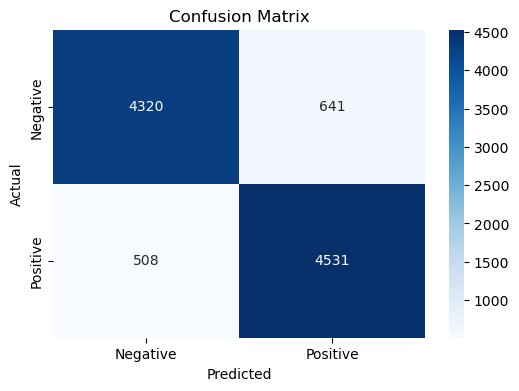

In [39]:
import seaborn as sns
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix_lr)
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
#SVM model
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train,y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test,y_pred_svm)
print("Acuuracy:",accuracy_svm)
print("\nClassification_report:",classification_report(y_test,y_pred_svm))



Acuuracy: 0.8794

Classification_report:               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [42]:
from sklearn.preprocessing import LabelBinarizer

# Get decision function scores instead of class labels
y_pred_scores = svm_model.decision_function(X_test)

# Convert y_test to binary (0/1) if it's categorical ('positive'/'negative')
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

print("\nROC-AUC SCORE:",roc_auc_score(y_test,y_pred_scores))


ROC-AUC SCORE: 0.9523533811797109



Confusion Matrix:
 [[4306  655]
 [ 551 4488]]


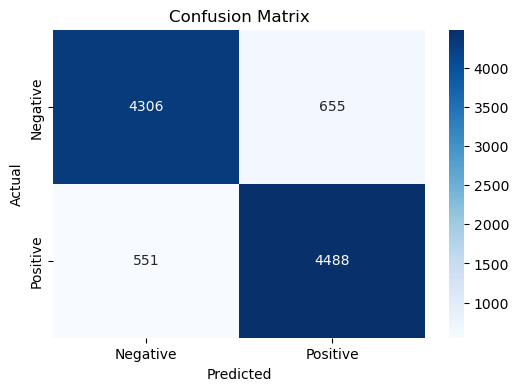

In [45]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test,y_pred_nb)
print("Accuracy:",accuracy_nb)
print("\nClassification Report:",classification_report(y_test,y_pred_nb))



Accuracy: 0.8399

Classification Report:               precision    recall  f1-score   support

    negative       0.84      0.83      0.84      4961
    positive       0.84      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [48]:
# Get probability scores for ROC-AUC
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
print("\nROC-AUC SCORE:",roc_auc_score(y_test,y_proba_nb))


ROC-AUC SCORE: 0.9193984562020753



Confusion Matrix:
 [[4131  830]
 [ 771 4268]]


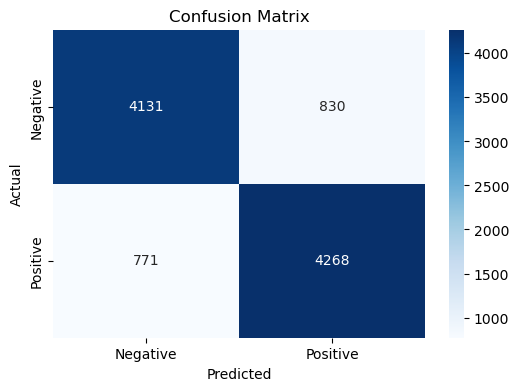

In [51]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:\n", conf_matrix_nb)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 ## Prediction on New Review

In [59]:
new_review = "Bad Boys is an action-packed thrill ride with perfect chemistry between Will Smith and Martin Lawrence, delivering nonstop entertainment. The film blends intense action sequences with sharp humor, creating a fun and engaging experience from start to finish. Michael Bay’s stylish direction brings high-energy chases, explosive shootouts, and a slick visual appeal that keeps the adrenaline pumping. Smith’s cool charisma and Lawrence’s comedic timing make for a dynamic duo, balancing action with laugh-out-loud moments. The fast-paced story keeps viewers hooked, while the iconic soundtrack adds to the film’s electrifying vibe. Bad Boys is the perfect mix of action, comedy, and buddy-cop charm, making it a must-watch for fans of high-energy thrillers."
new_processed_review = preprocess_review(new_review)
print(new_processed_review)

bad boy thrill ride perfect chemistry smith martin lawrence delivering nonstop entertainment film blend intense action sequence sharp humor creating fun engaging experience start finish michael bay stylish direction brings chase explosive shootout slick visual appeal keep adrenaline pumping smith cool charisma lawrence comedic timing make dynamic duo balancing action moment story keep viewer hooked iconic soundtrack add film electrifying vibe bad boy perfect mix action comedy charm making fan thriller


In [71]:


new_tfidf = tfidf_vectorizer.transform([new_processed_review])

new_word_count = len(new_processed_review.split())
new_char_count = len(new_processed_review)
new_avg_word_length = np.mean([len(word) for word in new_processed_review.split()])

#Combine TF-IDF and textual features
new_features = pd.concat([
    pd.DataFrame(new_tfidf.toarray(), columns=X_train.columns[:-3]),  # Use X_train's TF-IDF column names
    pd.DataFrame([[new_word_count, new_char_count, new_avg_word_length]], columns=['word_count', 'char_count', 'avg_word_length'])
], axis=1)

#Ensure column order matches X_train
new_features = new_features[X_train.columns]



In [77]:
#logistic regression model
prediction1 = lr_model.predict(new_features)
sentiment1 = "Positive" if prediction1[0].lower() == 'positive' else "Negative"
print(f"Predicted Sentiment: {sentiment1}")

Predicted Sentiment: Positive


In [79]:
#svm model
prediction2 = svm_model.predict(new_features)
sentiment2 = "Positive" if prediction2[0].lower() == 'positive' else "Negative"
print(f"Predicted Sentiment: {sentiment2}")

Predicted Sentiment: Positive


In [81]:
#naive bayes model
prediction3 = nb_model.predict(new_features)
sentiment3 = "Positive" if prediction3[0].lower() == 'positive' else "Negative"
print(f"Predicted Sentiment: {sentiment3}")

Predicted Sentiment: Positive


## INSIGHTS

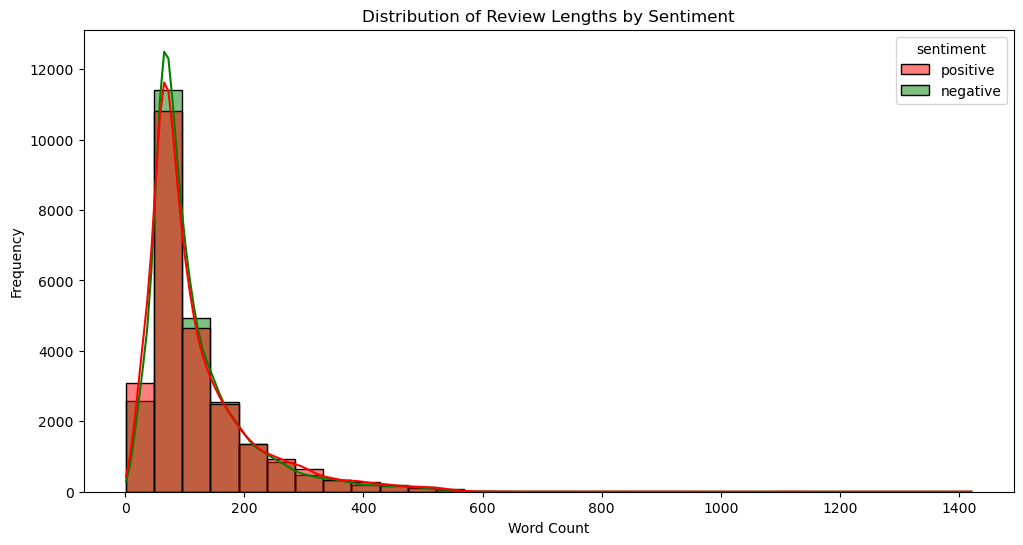

C:\Users\vyshn\AppData\Local\Temp\ipykernel_6328\2001537932.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='word_count', palette=['red', 'green'])


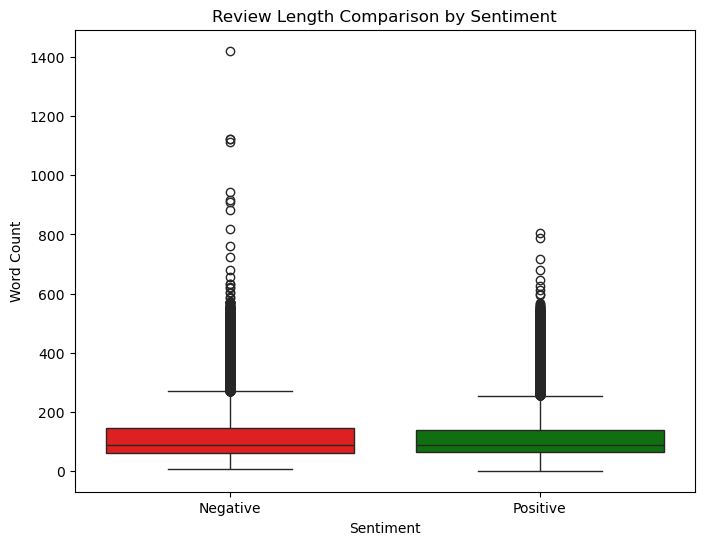

In [84]:
#Word Frequency: High frequency highlight important words that drive sentiment.
#Review Length: Longer reviews provide more context, while shorter reviews may lack detail.

# Histogram of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='sentiment', bins=30, kde=True, palette=['red', 'green'])
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Box plot comparing review lengths
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='word_count', palette=['red', 'green'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Review Length Comparison by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

In [85]:
#Extract coefficients
coefficients = svm_model.coef_[0] 

#Combine feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
numerical_features = ['word_count', 'char_count', 'avg_word_length']
feature_names = list(tfidf_feature_names) + numerical_features

#Verify lengths
print("Length of feature_names:", len(feature_names))
print("Length of coefficients:", len(coefficients))

#Create DataFrame
if len(feature_names) == len(coefficients):
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    print("Top Positive Features:")
    print(feature_importance.head(10))
else:
    print("Mismatch in feature lengths. Check your feature_names and coefficients.")

Length of feature_names: 5003
Length of coefficients: 5003
Top Positive Features:
          Feature  Coefficient
3597   refreshing     3.465505
1538    excellent     3.192262
1948        great     2.730906
3222      perfect     2.704986
3224    perfectly     2.640447
152       amazing     2.620560
4938  wonderfully     2.576338
1466    enjoyable     2.378366
2098    hilarious     2.359891
532     brilliant     2.336736


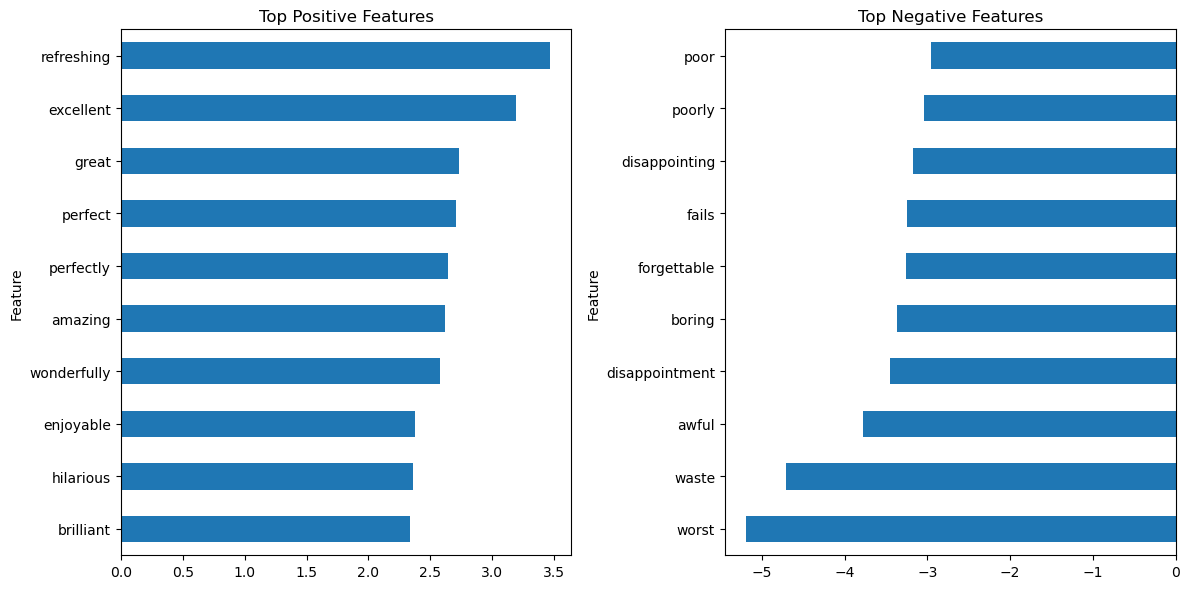

In [86]:
#top positive and negative features
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Top positive features
feature_importance.head(10).set_index('Feature').plot(kind='barh', ax=ax[0], title="Top Positive Features", legend=False)
ax[0].invert_yaxis() 

# Top negative features
feature_importance.tail(10).set_index('Feature').plot(kind='barh', ax=ax[1], title="Top Negative Features", legend=False)
ax[1].invert_yaxis()  

plt.tight_layout()
plt.show()

### Video Explanation Link

In [ ]:
https://drive.google.com/file/d/1mrIrKjgsQvxL_95H0Ypka0jHXiSPDOwI/view?usp=sharing